In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from sklearn import preprocessing

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
#imports dataset
data = pd.read_csv('adult.csv')
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## <b> Data Preprocessing: <b> 


In [3]:
# Explicitly defined columns because the csv file didn't have column names
data.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-Num', 'Maritial-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-Gain', 'Capital-Loss', 'Hours-Per-Week', 'Native-Country', 'Income']
data.head()

,Age,Workclass,Fnlwgt,Education,Education-Num,Maritial-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
#checked for missing values
data.isnull().sum()
data.head()

,Age,Workclass,Fnlwgt,Education,Education-Num,Maritial-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
#This changes the obj_data into numerical by using the labelEncoder 
obj_data = data.select_dtypes(include=['object']).copy()
int_data = data.select_dtypes(include=['int64']).copy()
df_enc = obj_data.apply(preprocessing.LabelEncoder().fit_transform)

df = df_enc.merge(int_data, left_index=True, right_index=True)
df.head()

,Workclass,Education,Maritial-Status,Occupation,Relationship,Race,Sex,Native-Country,Income,Age,Fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
0,6,9,2,4,0,4,1,39,0,50,83311,13,0,0,13
1,4,11,0,6,1,4,1,39,0,38,215646,9,0,0,40
2,4,1,2,6,0,2,1,39,0,53,234721,7,0,0,40
3,4,9,2,10,5,2,0,5,0,28,338409,13,0,0,40
4,4,12,2,4,5,4,0,39,0,37,284582,14,0,0,40


In [6]:
df.describe()

,Workclass,Education,Maritial-Status,Occupation,Relationship,Race,Sex,Native-Country,Income,Age,Fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,3.868796,10.298249,2.611794,6.572912,1.446376,3.665848,0.669195,36.718796,0.240817,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,1.455879,3.870317,1.506225,4.228809,1.606794,0.848817,0.470510,7.823892,0.427586,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,39.000000,0.000000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,4.000000,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,39.000000,0.000000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,39.000000,0.000000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,8.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,41.000000,1.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
# after changing it to numerical values and looking at the analysis (describe),
# we can see that the values of Fnlwgt are much larger than any of the other values
# it measure the weight that the individual of the sample has in representing the entirety if a population 
# we can delete it beause we don't need it for our problem
del df['Fnlwgt']
df

,Workclass,Education,Maritial-Status,Occupation,Relationship,Race,Sex,Native-Country,Income,Age,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
0,6,9,2,4,0,4,1,39,0,50,13,0,0,13
1,4,11,0,6,1,4,1,39,0,38,9,0,0,40
2,4,1,2,6,0,2,1,39,0,53,7,0,0,40
3,4,9,2,10,5,2,0,5,0,28,13,0,0,40
4,4,12,2,4,5,4,0,39,0,37,14,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,4,7,2,13,5,4,0,39,0,27,12,0,0,38
32556,4,11,2,7,0,4,1,39,1,40,9,0,0,40
32557,4,11,6,1,4,4,0,39,0,58,9,0,0,40
32558,4,11,4,1,3,4,1,39,0,22,9,0,0,20


In [8]:
#finding the interquartile range (IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Workclass           0.0
Education           3.0
Maritial-Status     2.0
Occupation          7.0
Relationship        3.0
Race                0.0
Sex                 1.0
Native-Country      0.0
Income              0.0
Age                20.0
Education-Num       3.0
Capital-Gain        0.0
Capital-Loss        0.0
Hours-Per-Week      5.0
dtype: float64


In [9]:
#the values that are 'True' represent the presence of the outlier
print(df < (Q1 - 1.5 * IQR)) or (df > (Q3 + 1.5 * IQR))

       Workclass  Education  Maritial-Status  Occupation  Relationship   Race  \
0          False      False            False       False         False  False   
1          False      False            False       False         False  False   
2          False       True            False       False         False   True   
3          False      False            False       False         False   True   
4          False      False            False       False         False  False   
...          ...        ...              ...         ...           ...    ...   
32555      False      False            False       False         False  False   
32556      False      False            False       False         False  False   
32557      False      False            False       False         False  False   
32558      False      False            False       False         False  False   
32559      False      False            False       False         False  False   

         Sex  Native-Countr

,Workclass,Education,Maritial-Status,Occupation,Relationship,Race,Sex,Native-Country,Income,Age,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
0,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32556,False,False,False,False,False,False,False,False,True,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
from scipy import stats
z_score = stats.zscore(df)
z_score

array([[ 1.46388339, -0.33544266, -0.40618296, ..., -0.14591373,
        -0.21666301, -2.22212013],
       [ 0.09012148,  0.18131885, -1.73402603, ..., -0.14591373,
        -0.21666301, -0.03542999],
       [ 0.09012148, -2.40248871, -0.40618296, ..., -0.14591373,
        -0.21666301, -0.03542999],
       ...,
       [ 0.09012148,  0.18131885,  2.2495032 , ..., -0.14591373,
        -0.21666301, -0.03542999],
       [ 0.09012148,  0.18131885,  0.92166012, ..., -0.14591373,
        -0.21666301, -1.65520046],
       [ 0.77700244,  0.18131885, -0.40618296, ...,  1.88840054,
        -0.21666301, -0.03542999]])

{'whiskers': [<matplotlib.lines.Line2D at 0x21047889e08>,
 'caps': [<matplotlib.lines.Line2D at 0x21047889f88>,
 'boxes': [<matplotlib.lines.Line2D at 0x21046e1f408>,
 'medians': [<matplotlib.lines.Line2D at 0x21047894bc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x21047899c88>,
 'means': []}

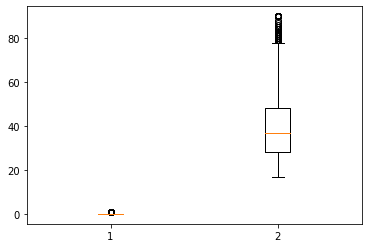

In [11]:
x1=df['Income']
x2=df['Age']
plt.boxplot([x1,x2])

In [12]:
columnNames = df.columns
columnNames

Index(['Workclass', 'Education', 'Maritial-Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native-Country', 'Income', 'Age',
       'Education-Num', 'Capital-Gain', 'Capital-Loss', 'Hours-Per-Week'],
      dtype='object')

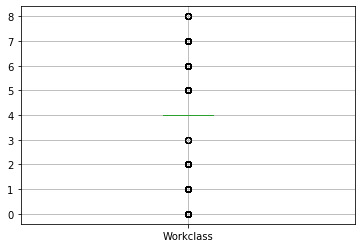

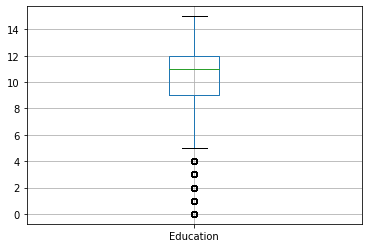

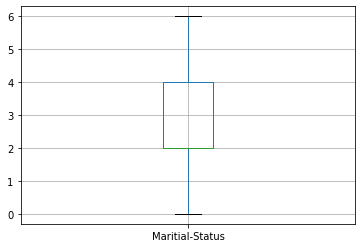

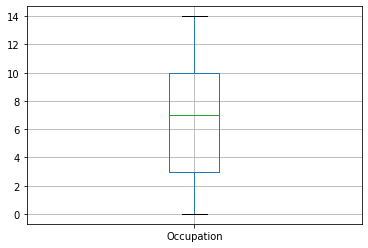

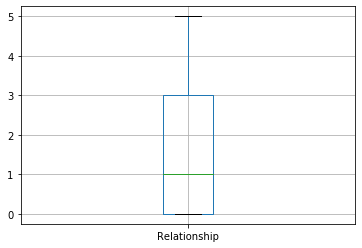

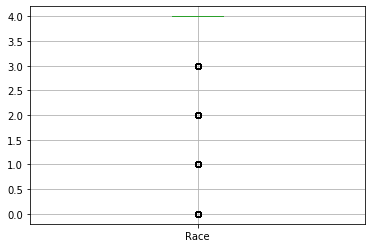

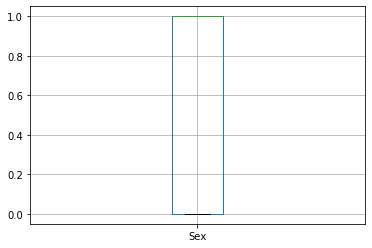

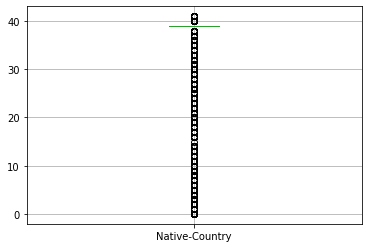

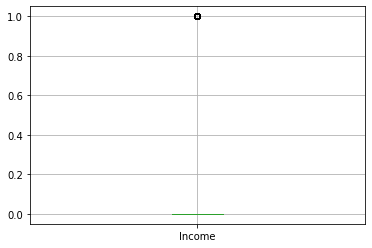

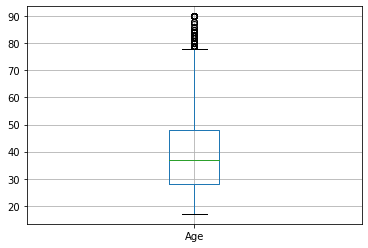

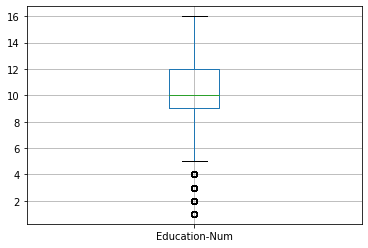

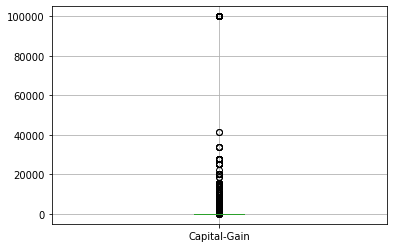

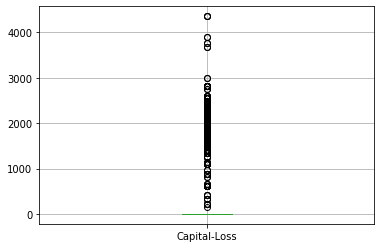

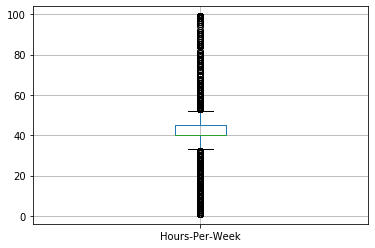

In [13]:
for column in df:
    plt.figure()
    df.boxplot([column])

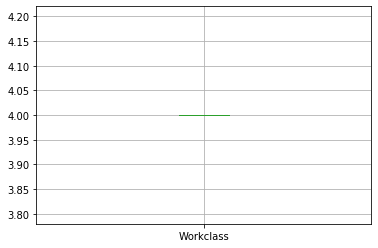

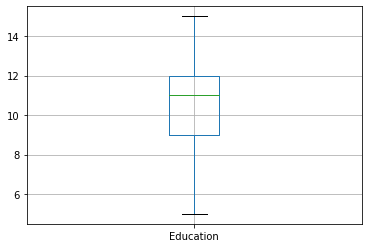

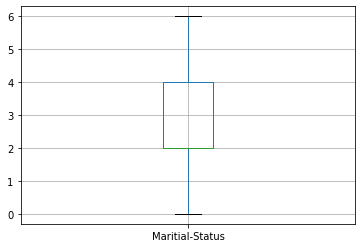

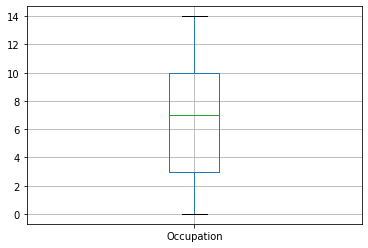

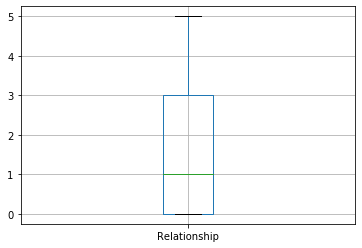

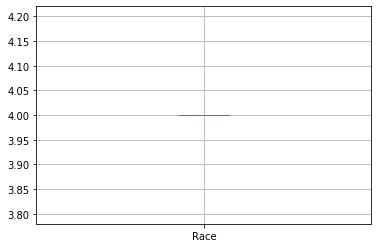

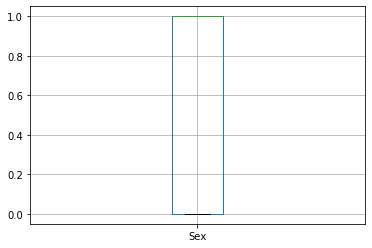

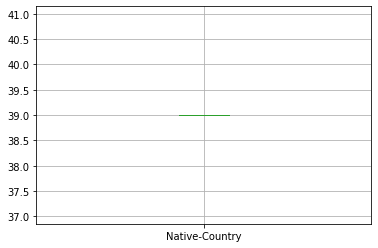

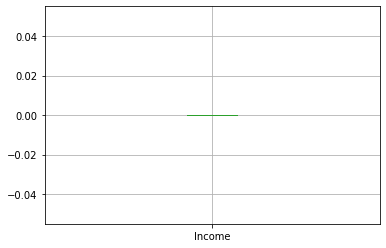

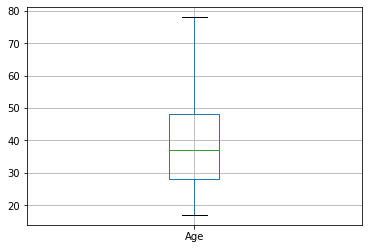

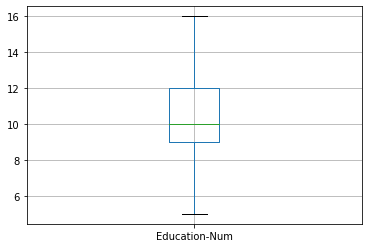

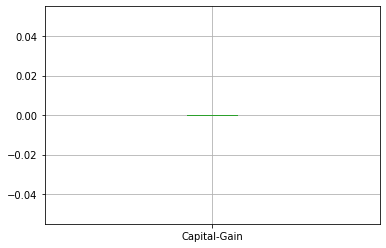

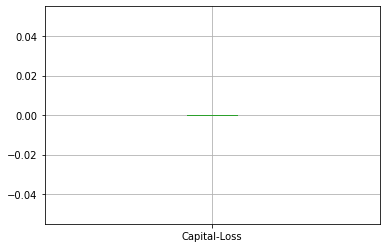

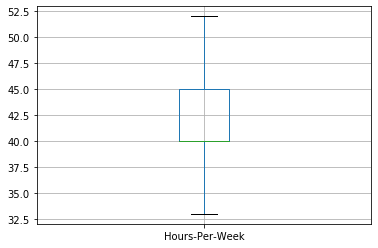

In [14]:
#boxplots that doesn't show outliers, just the majority of the data
for column in df:
    plt.figure()
    df.boxplot([column], showfliers=False)

## <b> Multiple Regression </b>

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

,Workclass,Education,Maritial-Status,Occupation,Relationship,Race,Sex,Native-Country,Income,Age,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
Workclass,1.000000,0.023537,-0.064798,0.255004,-0.090449,0.049720,0.095942,-0.007710,0.051645,0.003786,0.052015,0.033828,0.012231,0.138974
Education,0.023537,1.000000,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.064291,0.079311,-0.010508,0.359172,0.030047,0.016744,0.055510
Maritial-Status,-0.064798,-0.038398,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.023827,-0.199295,-0.266292,-0.069338,-0.043398,-0.034182,-0.190521
Occupation,0.255004,-0.021274,-0.009617,1.000000,-0.075620,0.006779,0.080328,-0.012532,0.075448,-0.020946,0.109748,0.025511,0.017979,0.080384
Relationship,-0.090449,-0.010879,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.005504,-0.250924,-0.263698,-0.094145,-0.057918,-0.061064,-0.248975
Race,0.049720,0.014135,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.137849,0.071853,0.028718,0.031825,0.011143,0.018902,0.041910
Sex,0.095942,-0.027349,-0.129337,0.080328,-0.582453,0.087197,1.000000,-0.008125,0.215995,0.088832,0.012256,0.048477,0.045572,0.229312
Native-Country,-0.007710,0.064291,-0.023827,-0.012532,-0.005504,0.137849,-0.008125,1.000000,0.015845,-0.001151,0.050831,-0.001984,0.000420,-0.002671
Income,0.051645,0.079311,-0.199295,0.075448,-0.250924,0.071853,0.215995,0.015845,1.000000,0.234039,0.335182,0.223333,0.150523,0.229690
Age,0.003786,-0.010508,-0.266292,-0.020946,-0.263698,0.028718,0.088832,-0.001151,0.234039,1.000000,0.036527,0.077674,0.057775,0.068756


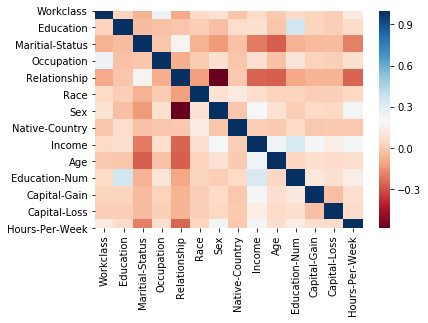

In [16]:
# calculate the correlation matrix
corr = df.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [17]:
# get the summary
df.describe()

,Workclass,Education,Maritial-Status,Occupation,Relationship,Race,Sex,Native-Country,Income,Age,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
count,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,3.868796,10.298249,2.611794,6.572912,1.446376,3.665848,0.669195,36.718796,0.240817,38.581634,10.080590,1077.615172,87.306511,40.437469
std,1.455879,3.870317,1.506225,4.228809,1.606794,0.848817,0.470510,7.823892,0.427586,13.640642,2.572709,7385.402999,402.966116,12.347618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.000000,0.000000,0.000000,1.000000
25%,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,39.000000,0.000000,28.000000,9.000000,0.000000,0.000000,40.000000
50%,4.000000,11.000000,2.000000,7.000000,1.000000,4.000000,1.000000,39.000000,0.000000,37.000000,10.000000,0.000000,0.000000,40.000000
75%,4.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,39.000000,0.000000,48.000000,12.000000,0.000000,0.000000,45.000000
max,8.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.000000,41.000000,1.000000,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [18]:
#building testing and training sets
from sklearn.model_selection import train_test_split

X = df.drop('Income', axis = 1)
Y = df[['Income']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# fit the model
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]
print("The intercept for our model is {:.4}".format(intercept))

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -0.5802
The Coefficient for Workclass is -0.0018
The Coefficient for Education is -0.0038
The Coefficient for Maritial-Status is -0.023
The Coefficient for Occupation is 0.0016
The Coefficient for Relationship is -0.017
The Coefficient for Race is 0.014
The Coefficient for Sex is 0.1
The Coefficient for Native-Country is 6.4e-05
The Coefficient for Age is 0.0046
The Coefficient for Education-Num is 0.047
The Coefficient for Capital-Gain is 9.3e-06
The Coefficient for Capital-Loss is 0.00011
The Coefficient for Hours-Per-Week is 0.0036


In [20]:
# Get multiple predictions
y_predict = regression_model.predict(X_test)

# Show the first 5 predictions
y_predict[:5]

array([[0.31435994],
       [0.24651172],
       [0.12791392],
       [0.2261972 ],
       [0.29425088]])

In [21]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.133
MAE 0.291
RMSE 0.364


In [22]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.26


In [23]:
import statsmodels.api as sm

In [24]:
X = sm.add_constant(X)

C:\Users\aaron\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [25]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     887.8
Date:                Tue, 17 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:57:40   Log-Likelihood:                -13596.
No. Observations:               32560   AIC:                         2.722e+04
Df Residuals:                   32546   BIC:                         2.734e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.5777      0.020    -

## <b> Logistic regression </b>

In [26]:
from sklearn.linear_model import LogisticRegression 

In [27]:
logisticRegr = LogisticRegression()

In [28]:
logisticRegr.fit(X_train, y_train)

C:\Users\aaron\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aaron\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Make predictions on entire test data
predictions = logisticRegr.predict(X_test[0:10])
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [30]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.8065110565110565


In [31]:
from sklearn import metrics

In [32]:
# Make predictions on test data
predictions = logisticRegr.predict(X_test)

In [33]:
cm = metrics.confusion_matrix(y_test, predictions)
#cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

In [34]:
columns_data = data[['Age', 'Workclass', 'Education', 'Education-Num', 'Maritial-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-Gain', 'Capital-Loss', 'Hours-Per-Week', 'Native-Country', 'Income']]

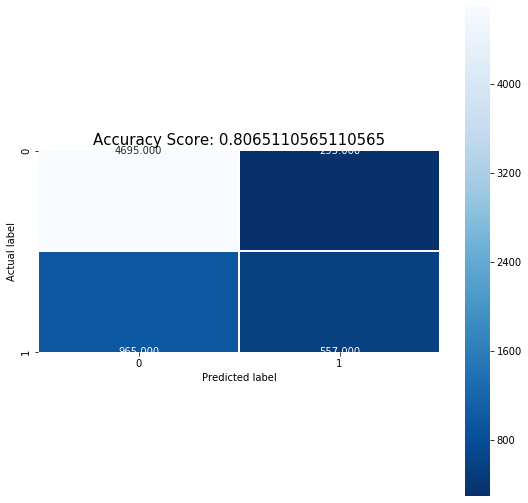

In [35]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [36]:
index = 0
misclassifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict != actual: 
        misclassifiedIndex.append(index)
    index +=1

In [37]:
plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(misclassifiedIndex[10:15]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong], y_test[wrong]), fontsize = 20)

<Figure size 1440x288 with 0 Axes>

In [38]:
import seaborn as sns

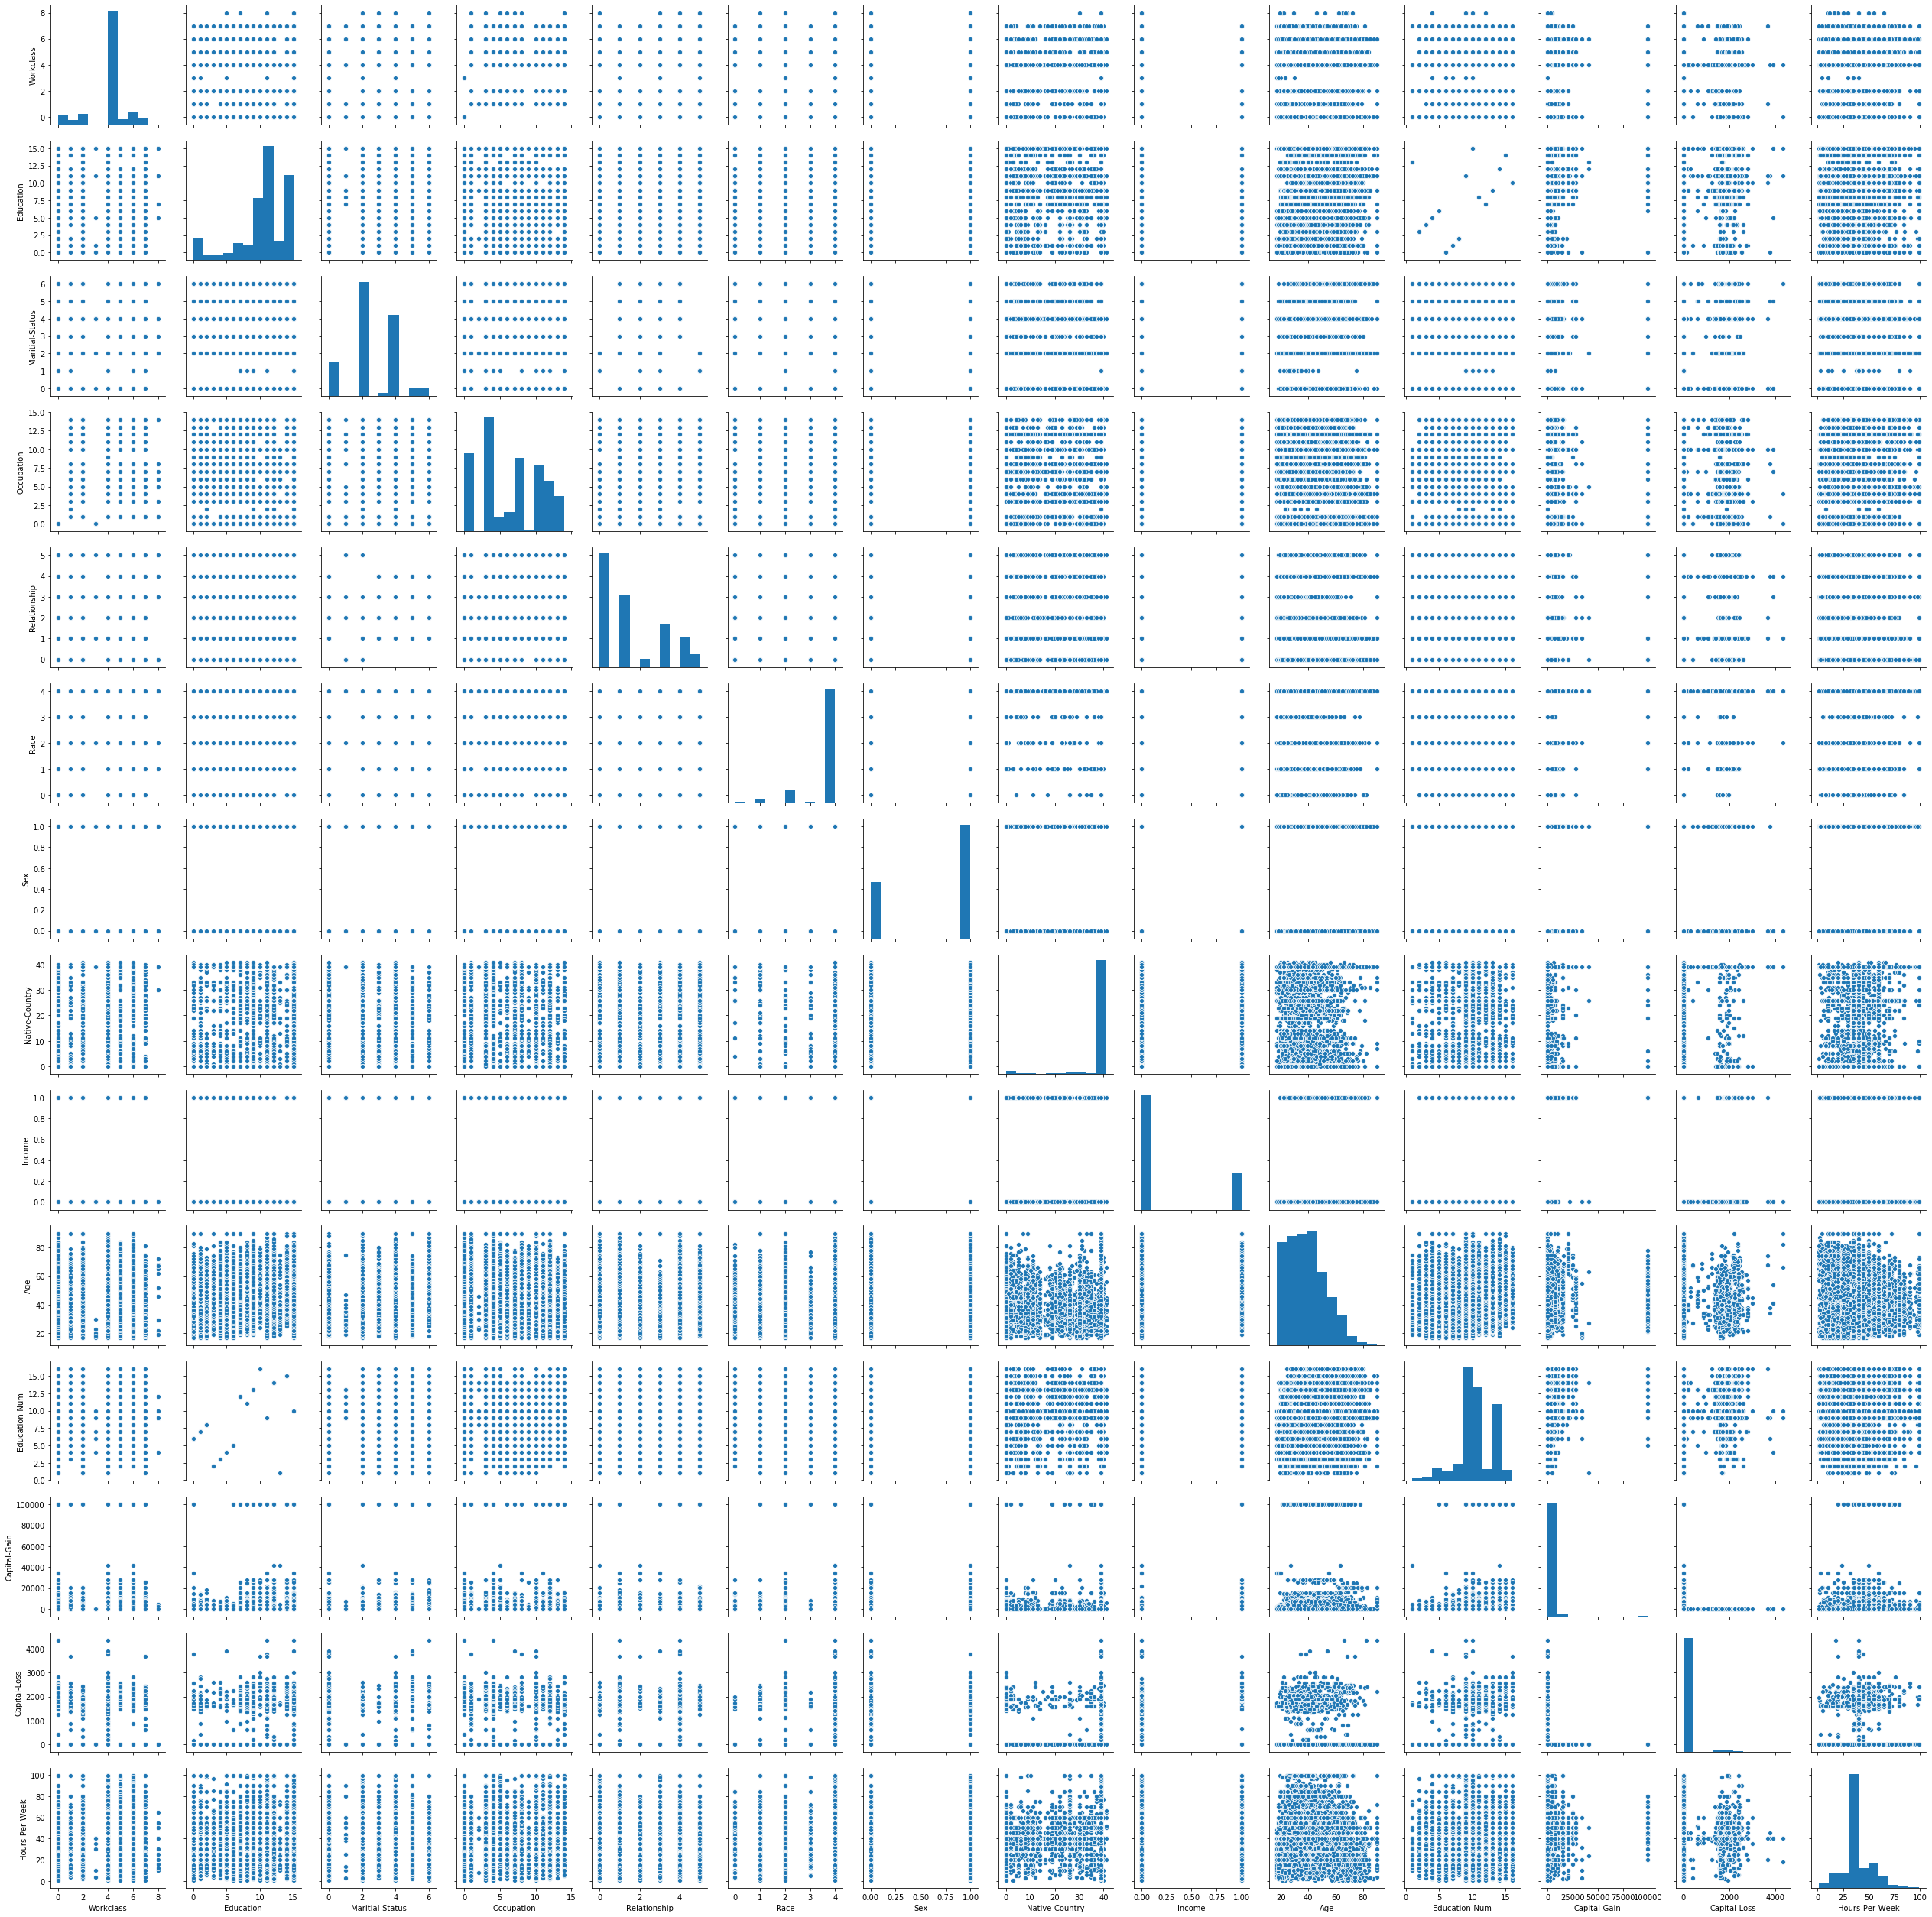

In [39]:
sns.pairplot(df)

## <b> Naive Bayes: <b> 


In [55]:
# Naive Bayes Implementation
df
df_target = df["Income"]
df_features = df.drop(columns = ["Income"])

In [59]:
#Working Version of Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.25)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8049140049140049


In [60]:

#Alternate way to do Naive Byes
df.columns
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target)
model = GaussianNB()
model.fit(X_train, y_train)
target_pred = model.predict(X_test)

count = 0

for i in target_pred:
    count = count + 1
print("# of items in target_pred: ", count)

#not 100% about these results, need to look more into them
# I think it might be trying to predict every row in the dataset or something similar
accuracy = accuracy_score(y_test, target_pred)*100
print("Accuracy of Naive Bayes predictions: ", accuracy)

# of items in target_pred:  8140
Accuracy of Naive Bayes predictions:  80.3071253071253


In [61]:
mat = confusion_matrix(target_pred, y_test)
names = np.unqiue(pred)
sns.heatmap(mat, square=True, annot = True, fmt = 'd', cbar = False, xticklabels = names, yticklabels = names)
plt.xlabel('X')
plt.xlabel('Predicted')

AttributeError: module 'numpy' has no attribute 'unqiue'

## <b> Random Forest: <b> 


In [68]:
#Random Forest Preprocessing
#put all data into numpy arrays

target = np.array(df["Income"])
features = df.drop(columns = ["Income"])
feature_names = list(features.columns)
features = np.array(features)
print(target)
print(features)

[0 0 0 ... 0 0 1]
[[    6     9     2 ...     0     0    13]
 [    4    11     0 ...     0     0    40]
 [    4     1     2 ...     0     0    40]
 ...
 [    4    11     6 ...     0     0    40]
 [    4    11     4 ...     0     0    20]
 [    5    11     2 ... 15024     0    40]]


In [69]:
#Split data into Test and Train data

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25)
print("Training Features Shape: ", X_train.shape)
print("Training Target Shape: ", y_train.shape)
print("Testing Features Shape: ", X_test.shape)
print("Testing Target Shape: ", y_test.shape)


Training Features Shape:  (24420, 13)
Training Target Shape:  (24420,)
Testing Features Shape:  (8140, 13)
Testing Target Shape:  (8140,)


In [74]:
from sklearn.ensemble import RandomForestRegressor

#Create Random Forest Model with 1000 Trees
randoForest = RandomForestRegressor(n_estimators = 1000, random_state = 42)
randoForest.fit(X_train, y_train)

#Prediction on test data
predictions = randoForest.predict(X_test)

#Calc errors
errors = abs(predictions - y_test)
print("MAE: ", round(np.mean(errors), 2), "degrees")
print("These are extremely good results")

MAE:  0.19 degrees
These are extremely good results


In [78]:
MAEpercent = 100* (errors/y_test)

accuracy = 100 - np.mean(MAEpercent)
print("Accuracy: ", round(accuracy, 2), "%.")

Accuracy:  nan %.


C:\Users\aaron\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\aaron\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


## <b> K-Means Clustering: <b>

In [237]:
# Import remaining required packages
# Plot styling
import seaborn as sns; sns.set()  # for plot styling

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

%matplotlib inline

In [238]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education-Num,Maritial-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [239]:
df.head()

,Workclass,Education,Maritial-Status,Occupation,Relationship,Race,Sex,Native-Country,Income,Age,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
0,6,9,2,4,0,4,1,39,0,50,13,0,0,13
1,4,11,0,6,1,4,1,39,0,38,9,0,0,40
2,4,1,2,6,0,2,1,39,0,53,7,0,0,40
3,4,9,2,10,5,2,0,5,0,28,13,0,0,40
4,4,12,2,4,5,4,0,39,0,37,14,0,0,40


Because of the size and the fact that the set is unscaled, I will need to perform PCA and scaling on the set before I can perform clustering.

### PCA and Scaling:

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
Workclass          32560 non-null int32
Education          32560 non-null int32
Maritial-Status    32560 non-null int32
Occupation         32560 non-null int32
Relationship       32560 non-null int32
Race               32560 non-null int32
Sex                32560 non-null int32
Native-Country     32560 non-null int32
Income             32560 non-null int32
Age                32560 non-null int64
Education-Num      32560 non-null int64
Capital-Gain       32560 non-null int64
Capital-Loss       32560 non-null int64
Hours-Per-Week     32560 non-null int64
dtypes: int32(9), int64(5)
memory usage: 2.4 MB


In [267]:
df.mean()

Workclass             3.868796
Education            10.298249
Maritial-Status       2.611794
Occupation            6.572912
Relationship          1.446376
Race                  3.665848
Sex                   0.669195
Native-Country       36.718796
Income                0.240817
Age                  38.581634
Education-Num        10.080590
Capital-Gain       1077.615172
Capital-Loss         87.306511
Hours-Per-Week       40.437469
dtype: float64

In [268]:
df.var()

Workclass          2.119583e+00
Education          1.497935e+01
Maritial-Status    2.268714e+00
Occupation         1.788283e+01
Relationship       2.581786e+00
Race               7.204897e-01
Sex                2.213797e-01
Native-Country     6.121328e+01
Income             1.828298e-01
Age                1.860671e+02
Education-Num      6.618831e+00
Capital-Gain       5.454418e+07
Capital-Loss       1.623817e+05
Hours-Per-Week     1.524637e+02
dtype: float64

In [269]:
# Scaling:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
X.head()

,Workclass,Education,Maritial-Status,Occupation,Relationship,Race,Sex,Native-Country,Income,Age,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
0,1.463883,-0.335443,-0.406183,-0.608434,-0.900177,0.393675,0.703087,0.291573,-0.56321,0.837097,1.134779,-0.145914,-0.216663,-2.22212
1,0.090121,0.181319,-1.734026,-0.135480,-0.277810,0.393675,0.703087,0.291573,-0.56321,-0.042640,-0.420027,-0.145914,-0.216663,-0.03543
2,0.090121,-2.402489,-0.406183,-0.135480,-0.900177,-1.962583,0.703087,0.291573,-0.56321,1.057031,-1.197429,-0.145914,-0.216663,-0.03543
3,0.090121,-0.335443,-0.406183,0.810427,2.211658,-1.962583,-1.422298,-4.054157,-0.56321,-0.775755,1.134779,-0.145914,-0.216663,-0.03543
4,0.090121,0.439700,-0.406183,-0.608434,2.211658,0.393675,-1.422298,0.291573,-0.56321,-0.115952,1.523480,-0.145914,-0.216663,-0.03543


In [270]:
X.mean()

Workclass          4.317185e-16
Education          1.326890e-15
Maritial-Status    2.128178e-16
Occupation        -2.183893e-16
Relationship      -3.435963e-16
Race               2.071831e-15
Sex               -2.825340e-16
Native-Country    -7.107678e-17
Income             1.073998e-15
Age                1.224314e-16
Education-Num     -7.645058e-17
Capital-Gain       6.867425e-16
Capital-Loss       1.481258e-16
Hours-Per-Week     7.912677e-16
dtype: float64

In [271]:
X.var()

Workclass          1.000031
Education          1.000031
Maritial-Status    1.000031
Occupation         1.000031
Relationship       1.000031
Race               1.000031
Sex                1.000031
Native-Country     1.000031
Income             1.000031
Age                1.000031
Education-Num      1.000031
Capital-Gain       1.000031
Capital-Loss       1.000031
Hours-Per-Week     1.000031
dtype: float64

In [272]:
# PCA
PCA().fit(X).components_.T

array([[ 1.66661805e-01, -6.73382475e-03, -5.88167753e-01,
        -1.30494112e-02,  2.69621032e-01,  1.74977687e-01,
        -1.35651968e-01,  5.10456885e-02, -7.34041825e-02,
         5.80279427e-01, -2.38043047e-01, -3.18889764e-01,
        -3.51400212e-02, -6.68673447e-03],
       [ 1.15779882e-01,  5.51889909e-01,  3.48462428e-02,
        -1.33786804e-01, -2.57713355e-01, -1.09894614e-01,
        -3.84845893e-01, -1.37179454e-01, -1.39073312e-01,
         3.19699463e-01,  1.60801765e-01,  3.01602842e-01,
         4.21763509e-01, -3.50248813e-02],
       [-2.93819989e-01,  6.98039890e-02, -2.34714974e-01,
        -4.05504874e-02, -3.49022048e-01, -2.59955311e-01,
         4.34741838e-01, -2.25916010e-01, -1.00187422e-02,
         6.96716150e-02, -6.10610306e-01,  1.96870836e-01,
         7.55466621e-02,  1.91105779e-02],
       [ 1.41093103e-01,  3.82641433e-02, -6.17614699e-01,
         7.17678000e-02,  1.88886388e-01,  1.71216824e-01,
         7.22801131e-02, -3.46769878e-01,  6.

In [273]:
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14'])
pca_loadings

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
Workclass,0.166662,-0.006734,-0.588168,-0.013049,0.269621,0.174978,-0.135652,0.051046,-0.073404,0.580279,-0.238043,-0.318890,-0.035140,-0.006687
Education,0.115780,0.551890,0.034846,-0.133787,-0.257713,-0.109895,-0.384846,-0.137179,-0.139073,0.319699,0.160802,0.301603,0.421764,-0.035025
Maritial-Status,-0.293820,0.069804,-0.234715,-0.040550,-0.349022,-0.259955,0.434742,-0.225916,-0.010019,0.069672,-0.610610,0.196871,0.075547,0.019111
Occupation,0.141093,0.038264,-0.617615,0.071768,0.188886,0.171217,0.072280,-0.346770,0.069674,-0.451998,0.241518,0.344061,0.125124,-0.006441
Relationship,-0.448951,0.316573,-0.020053,0.097057,0.250255,0.171006,0.032365,0.242025,-0.000444,-0.083803,-0.009820,-0.061250,0.215594,0.692499
Race,0.133239,-0.032536,0.028141,-0.626132,0.200797,0.033069,0.221065,0.160954,-0.664399,-0.126217,-0.034167,0.111343,0.003351,0.035129
Sex,0.389404,-0.367750,-0.088400,-0.113143,-0.346952,-0.261735,0.043865,-0.124747,0.052928,0.088839,0.199992,-0.118459,0.077082,0.644575
Native-Country,0.034024,0.142024,0.095374,-0.655010,0.216660,0.030409,0.100939,-0.105120,0.683072,0.055366,-0.032503,-0.026722,0.002283,0.001516
Income,0.416358,0.196905,0.139858,0.164773,0.054029,0.027049,0.275075,-0.003101,0.007849,-0.252383,-0.204831,-0.475483,0.560269,-0.127032
Age,0.273548,-0.130382,0.387054,0.171194,0.329186,0.241025,-0.151725,-0.403921,-0.046612,0.098062,-0.430242,0.344966,-0.040228,0.242711


In [274]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.462956,-0.339835,0.077813,-0.679753,0.471427,0.156030,-0.297900,-1.923694,-0.753053,1.337059,0.097912,-1.459951,-1.504416,0.232419
1,0.565247,-0.736502,0.323068,-0.670153,0.424562,0.123653,-1.005439,0.300293,-0.045800,0.237645,1.262745,-0.131694,-0.092552,0.227132
2,-0.063610,-2.785778,0.316906,1.207720,0.472513,0.176105,-0.113421,-0.527691,1.866890,0.133657,-0.272449,-0.329151,-0.766067,-0.029340
3,-1.947225,1.136443,-1.264851,4.125724,-0.247434,0.526482,-1.078404,0.801313,-1.507991,-1.019436,0.529795,-0.331118,-0.711749,0.602179
4,-1.312459,2.190579,0.362760,-0.280111,0.860473,0.550972,-0.633968,0.797110,-0.368523,-0.208467,-0.232667,-0.294319,-0.822201,0.896415


In [275]:
pca.explained_variance_

array([2.39926508, 1.44148584, 1.26526999, 1.13964582, 1.04076953,
       1.02380759, 0.9735611 , 0.85948076, 0.84646794, 0.76488965,
       0.69279312, 0.65122761, 0.52203703, 0.37972894])

In [276]:
pca.explained_variance_ratio_

array([0.17137081, 0.10296011, 0.09037365, 0.08140077, 0.0743384 ,
       0.07312687, 0.06953794, 0.0613896 , 0.06046014, 0.0546333 ,
       0.0494837 , 0.04651483, 0.03728721, 0.02712266])

([<matplotlib.axis.XTick at 0x1c4021d6748>,
 <a list of 14 Text xticklabel objects>)

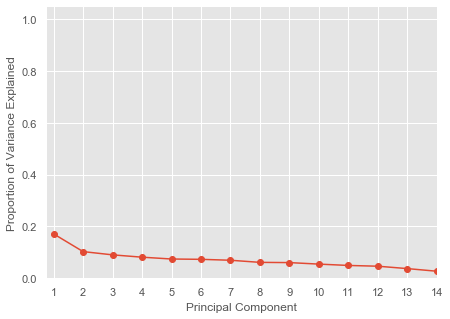

In [277]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
# We can also use the function cumsum(), which computes the cumulative sum of the elements of a numeric
# vector, to plot the cumulative PVE:

([<matplotlib.axis.XTick at 0x1c40148cac8>,
 <a list of 14 Text xticklabel objects>)

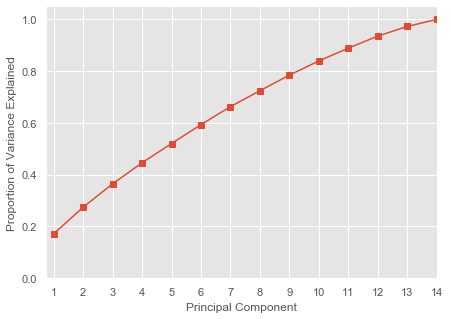

In [278]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14])

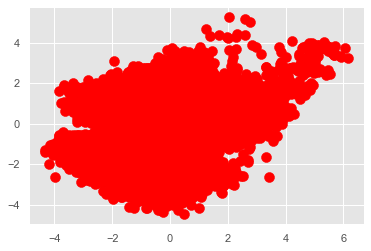

In [279]:
PC1 = df_plot['PC1'].values
PC2 = df_plot['PC2'].values
plt.scatter(PC1,PC2, c = 'red', s=100)

### Moving on to K-Means:

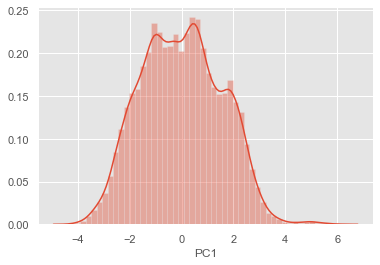

In [280]:
plot_pca1 = sns.distplot(df_plot["PC1"])

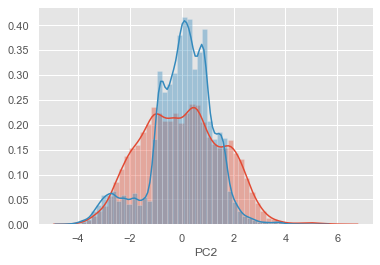

In [281]:
plot_pca1 = sns.distplot(df_plot["PC1"])
plot_pca2 = sns.distplot(df_plot["PC2"])

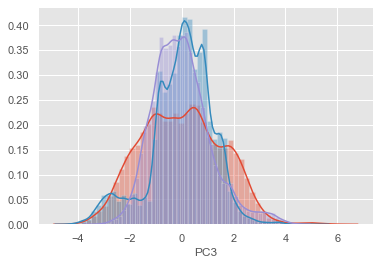

In [282]:
plot_pca1 = sns.distplot(df_plot["PC1"])
plot_pca2 = sns.distplot(df_plot["PC2"])
plot_pca3 = sns.distplot(df_plot["PC3"])

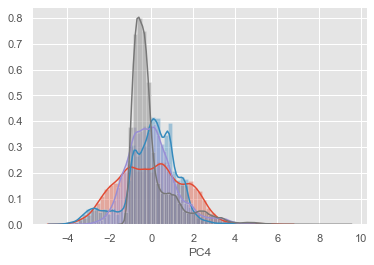

In [283]:
plot_pca1 = sns.distplot(df_plot["PC1"])
plot_pca2 = sns.distplot(df_plot["PC2"])
plot_pca3 = sns.distplot(df_plot["PC3"])
plot_pca4 = sns.distplot(df_plot["PC4"])

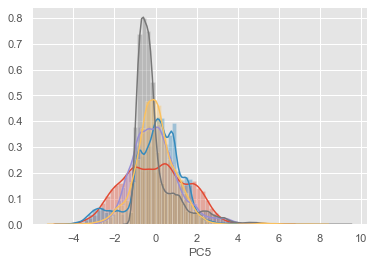

In [284]:
plot_pca1 = sns.distplot(df_plot["PC1"])
plot_pca2 = sns.distplot(df_plot["PC2"])
plot_pca3 = sns.distplot(df_plot["PC3"])
plot_pca4 = sns.distplot(df_plot["PC4"])
plot_pca5 = sns.distplot(df_plot["PC5"])

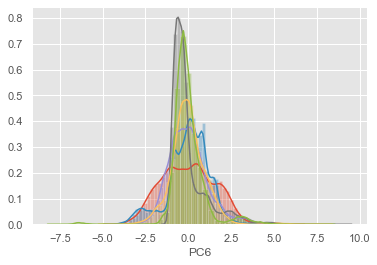

In [285]:
plot_pca1 = sns.distplot(df_plot["PC1"])
plot_pca2 = sns.distplot(df_plot["PC2"])
plot_pca3 = sns.distplot(df_plot["PC3"])
plot_pca4 = sns.distplot(df_plot["PC4"])
plot_pca5 = sns.distplot(df_plot["PC5"])
plot_pca6 = sns.distplot(df_plot["PC6"])

In [286]:
df_plot

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.462956,-0.339835,0.077813,-0.679753,0.471427,0.156030,-0.297900,-1.923694,-0.753053,1.337059,0.097912,-1.459951,-1.504416,0.232419
1,0.565247,-0.736502,0.323068,-0.670153,0.424562,0.123653,-1.005439,0.300293,-0.045800,0.237645,1.262745,-0.131694,-0.092552,0.227132
2,-0.063610,-2.785778,0.316906,1.207720,0.472513,0.176105,-0.113421,-0.527691,1.866890,0.133657,-0.272449,-0.329151,-0.766067,-0.029340
3,-1.947225,1.136443,-1.264851,4.125724,-0.247434,0.526482,-1.078404,0.801313,-1.507991,-1.019436,0.529795,-0.331118,-0.711749,0.602179
4,-1.312459,2.190579,0.362760,-0.280111,0.860473,0.550972,-0.633968,0.797110,-0.368523,-0.208467,-0.232667,-0.294319,-0.822201,0.896415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-1.623407,1.204123,-1.234905,-0.104398,1.480340,0.922646,0.183357,0.509974,0.009671,-1.456025,0.518314,-0.101822,-0.569992,0.619677
32556,1.501742,-0.390396,0.261677,-0.356967,0.024659,-0.188867,0.189864,-0.298795,-0.030828,-0.300455,-0.026956,-0.812252,1.207602,-0.441513
32557,-2.036807,0.677838,0.836284,-0.243847,0.498208,0.114641,0.385641,-0.064853,-0.349757,0.848114,-2.529436,0.888944,0.240170,0.589741
32558,-1.814360,-0.031788,0.169398,-1.014923,-0.661759,-0.748845,0.550092,-0.255220,-0.461419,1.009650,0.364968,-1.121754,0.266247,0.814218


In [287]:
del df_plot['PC3'], df_plot['PC4'], df_plot['PC5'], df_plot['PC6'], df_plot['PC7'], df_plot['PC8'], df_plot['PC10'], df_plot['PC11'], df_plot['PC12'], df_plot['PC13'], df_plot['PC14'] 
k_data=df_plot.iloc[:,[0,1]].values

In [288]:
k_data

array([[ 0.46295591, -0.33983544],
       [ 0.56524706, -0.73650153],
       [-0.06360975, -2.78577814],
       ...,
       [-2.0368065 ,  0.67783756],
       [-1.81436012, -0.03178835],
       [-0.1171958 ,  1.5960242 ]])

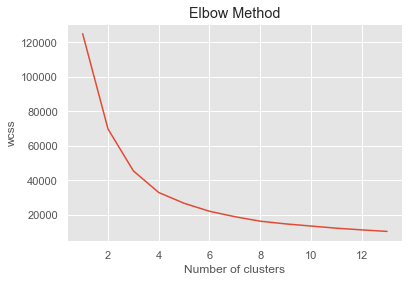

In [289]:
#Using the elbow method to find the ideal number of clusters
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# inertia_ is nothing but Sum of squared distances of samples to their closest cluster center.

# So as the clusters grow the points gets assigned to nearest cluster, so overal sum of square becomes less
from sklearn.cluster import KMeans
wcss = []
for i in range(1,14):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(k_data)
    wcss.append(km.inertia_)
plt.plot(range(1,14),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [290]:
#Calculating the #silhoutte  coefficient
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

#silhoutte co-efficent range is from -1 to 1 with 1 being best. It will tell how well clusters are separated

for n_cluster in range(2,11):
    kmeans = KMeans(n_clusters=n_cluster).fit(k_data)
    label = kmeans.labels_
    sil_coeff = silhouette_score(k_data, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.42330051043783395
For n_clusters=3, The Silhouette Coefficient is 0.4753867510721339
For n_clusters=4, The Silhouette Coefficient is 0.42841889785735293
For n_clusters=5, The Silhouette Coefficient is 0.4435039368610043
For n_clusters=6, The Silhouette Coefficient is 0.39624900373567445
For n_clusters=7, The Silhouette Coefficient is 0.4030649801247899
For n_clusters=8, The Silhouette Coefficient is 0.38805541881738415
For n_clusters=9, The Silhouette Coefficient is 0.3707888943766242
For n_clusters=10, The Silhouette Coefficient is 0.38470758461805193


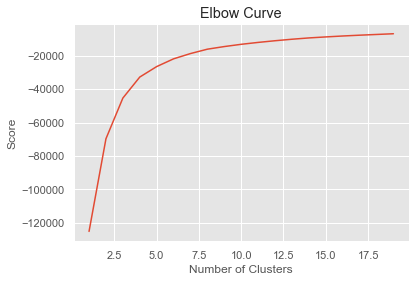

[-125051.00921580623, -69692.67006988847, -45383.73149704633, -32826.976081190835, -26570.141251291614, -21938.3323132218, -18787.491950108822, -16172.824904253084, -14608.74202863823, -13264.355771978408, -12130.243582820389, -11132.470315151537, -10233.980030578914, -9452.039492515607, -8851.042509531617, -8300.425150162293, -7815.491815514393, -7384.017551841813, -6953.11847917719]


In [291]:
import pylab as pl
from sklearn.decomposition import PCA

Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(k_data).score(k_data) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

print(score)

In [292]:
for k in range (1, 11):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(k_data)
    labels = kmeans_model.labels_
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
print()

k: 1  cost: 125051.00921580623
k: 2  cost: 69692.67519468792
k: 3  cost: 45383.72169605585
k: 4  cost: 32826.976081190835
k: 5  cost: 26569.943897576875
k: 6  cost: 21938.466181732503
k: 7  cost: 18787.19938039019
k: 8  cost: 16172.815343815384
k: 9  cost: 14609.02652396706
k: 10  cost: 13268.055825797615



In [293]:
##Fitting kmeans to the dataset
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(k_data)

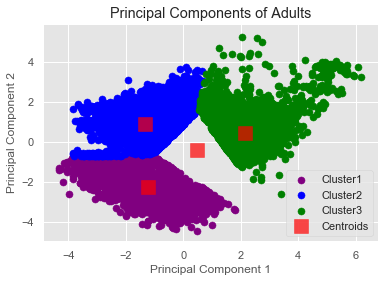

In [295]:
#Visualising the clusters for k=3
plt.scatter(k_data[y_means==0,0],k_data[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(k_data[y_means==1,0],k_data[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(k_data[y_means==2,0],k_data[y_means==2,1],s=50, c='green',label='Cluster3')


plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Principal Components of Adults')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

Probably going to add more visualizations, comparison, and interpretations